**Hypothesis Testing** <br><br>
I couldn't find a hypothesis testing kernel which was clear enough to me, so I decided to make one. Some stuff might have been omitted if I think it is too confusing for beginners. I do not go into detail on formulas since they are easy to forget and won't be used in 'real' situations. <br><br> I will look at how and when to use a hypothesis test, what the requirments are and how to use standard function to perform hypothesis tests.<br>

One important thing I want to make clear to beginners is that there are lots of different hypothesis tests and a different test is required depending on *what* you are trying to test.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as mstats

df_exams = pd.read_csv('../input/StudentsPerformance.csv')

print("finished imports and dataframe creation")

finished imports and dataframe creation


In [2]:
df_exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Tidy up the column names so they're easier to work with**

In [3]:
#make the column names easier to work with
df_exams.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)
df_exams.rename(columns={'parental level of education':'parents_education'},inplace=True)
df_exams.rename(columns={'test preparation course':'test_prep_course'},inplace=True)
df_exams.rename(columns={'math score':'math_score'},inplace=True)
df_exams.rename(columns={'reading score':'reading_score'},inplace=True)
df_exams.rename(columns={'writing score':'writing_score'},inplace=True)

In [4]:
df_exams.head()

,gender,ethnicity,parents_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Quickly check to see if the data is normally distirubted and if the groups are evenly represented**

In [5]:
#group C is over represented in the population
#when sampling we will have to take maybe 50 of each group
#using say 80 of group A seems like a bad idea, since we won't get much variation
#in any random sample we take
df_exams['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

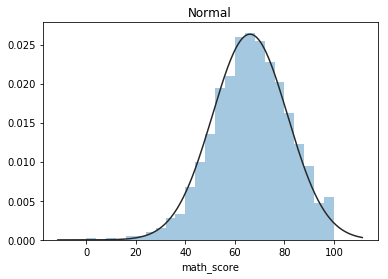

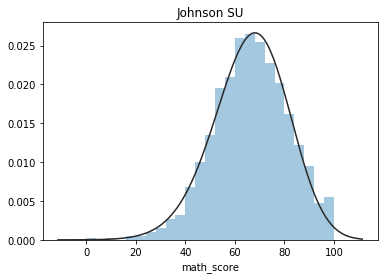

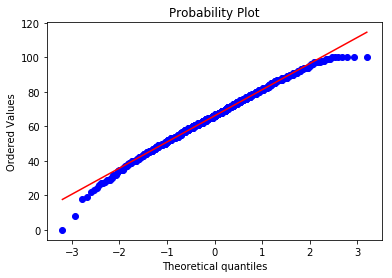

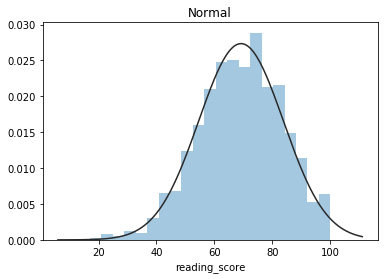

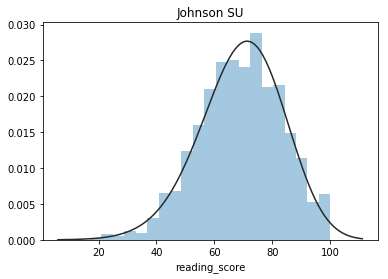

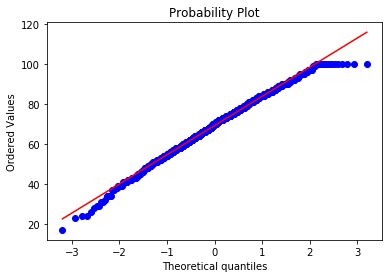

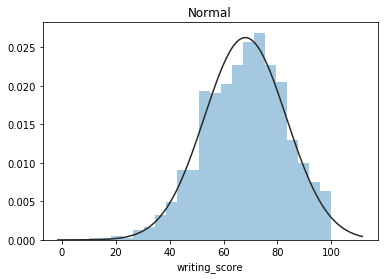

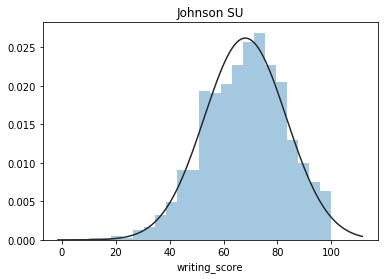

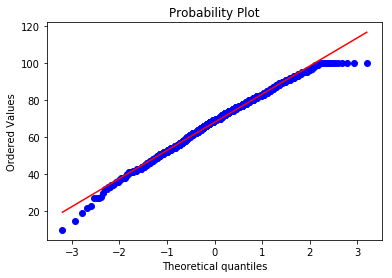

In [6]:
exams = ['math_score','reading_score','writing_score']
for exam in exams:
    y = df_exams[exam]
    plt.figure(1); plt.title('Normal')
    sns.distplot(y, kde=False, fit=stats.norm)

    plt.figure(2); plt.title('Johnson SU')
    sns.distplot(y, kde=False, fit=stats.johnsonsu)

    fig = plt.figure()
    res = stats.probplot(df_exams[exam], plot=plt)
    plt.show()

**Graph interpretation**<br><br>
These graphs show that the data isn't perfectly normally distirubted, the tails on all of them do not fit the normal distribution entirely. However, it is approximately normally distributed, so we should be ok.<br><br>
Additionally if they were normally distributed, the blue qq plot points would fit the red line perfectly.<br><br>
Also remember that this is the entire population, not just a sample, and we will be using samples to perform the hypothesis tests which should also be approximately normally distributed. Z tests and T tests are not valid to use if the data is not normally distributed.

**Hypothesis Tests**<br>

Hypotheis tests are used to test a theory about data in a scientifically rigourous way, so that we are not reliant on just chance or subjective assumptions.<br><br>

The tests I will be looking at will be about if a sample mean matches another sample mean, or (using the student scores as an example) if students of say a particular group's score differs from students of another group's score. This will make more sense once we get to the code. Other types of hypothesis tests exist such as tests based on probabilities and binomial distributions etc, but I'm not covering them here just yet.<br>

When setting up a hypothesis test, there is a null hypothesis (H0) and an alternative hypothesis (H1). A significance level must also be set, usually it is 5%. Significance level is the *highest* p-value which would be acceptable for us reject the null hypothesis.<br><br>

Hypothesis tests can be one-tailed or two tailed. One tail only tests one side (e.g your H1 might be 'I expect group A scores *higher* than group B'). Two tail (e.g 'I expect group A score *differently* than group B'). as you can see, two tail would account for high or lower 'math_score' results, but one tail only checks for the higher 'math_score'. <br><br>

Hypothesis tests usually generate a t-score or z-score, which are used to look up a t-distribution table to generate a p-value, which in turn represents the likelihood of us observing a t-score or z-score at least as extreme as the one we observe. p-values are usually automatically generated for us by library functions such as the hypothesis tests in scipy.stats. <br><br>

p-values as mentioned represent the likelihood of seeing scores at least as extreme as what we have observed. we usually want to see a low p-value (<= 0.05, the chosen significance level) which will confirm our findings.<br><br>

To start, lets take a sample of 50 students from group A and 50 from group B. Then calculate the Z scores for this data sample.

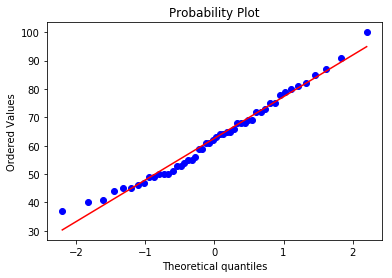

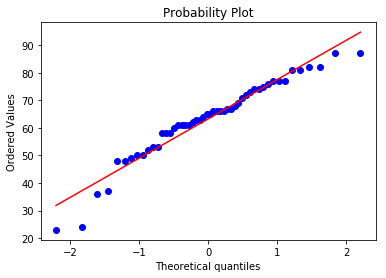

[ 0.23709195 -0.11363579  1.71014844 -0.46436352 -1.23596454  0.37738304
 -0.81509126  0.09680086  0.65796523  0.09680086  1.14898406  2.62204056
 -1.09567345 -1.79712892 -1.58669228  0.02665531  0.86840188 -0.67480016
 -0.95538235 -0.25392688 -1.165819   -1.30611009 -0.53450907  1.07883852
 -0.67480016  0.1669464  -0.11363579 -1.23596454  0.1669464  -0.04349024
 -0.88523681 -0.53450907  1.35942071  0.44752859 -0.95538235  0.65796523
  0.44752859  0.72811078  0.86840188 -0.25392688 -0.88523681  1.28927516
 -1.51654673  1.21912961 -0.88523681  0.37738304  1.99073063 -0.60465462
  0.37738304  1.56985735]
[-0.37379971 -1.01095831 -0.72777671  0.19256349  1.25449449  0.05097269
  0.19256349  0.40494969 -1.93129852 -2.78084332 -1.08175371  0.75892669
 -1.08175371 -0.94016291  0.75892669 -0.16141351  0.12176809 -0.37379971
 -0.72777671  0.26335889 -0.01982271  0.82972209 -2.85163872 -0.79857211
 -0.16141351  0.19256349  0.90051749  1.32528989  0.97131289  0.33415429
 -0.09061811  1.32528989 

In [7]:
#shuffle the dataframe
df_exams = df_exams.sample(frac=1)

group_a_sample = df_exams[df_exams['ethnicity'] == 'group A']
group_a_sample = group_a_sample[:50]

#if the qq plot points are on the line, the data is normally distributed
fig = plt.figure()
res = stats.probplot(group_a_sample['math_score'], plot=plt)
plt.show()

group_b_sample = df_exams[df_exams['ethnicity'] == 'group B']
group_b_sample = group_b_sample[:50]

fig = plt.figure()
res = stats.probplot(group_b_sample['math_score'], plot=plt)
plt.show()

print(stats.zscore(group_a_sample['math_score']))
print(stats.zscore(group_b_sample['math_score']))

The Z score tells us how many standard deviations from the mean of the sample the data point lies. -1.78 is 1.78 standard deviations to the left, 0.526 is 0.526 standard deviations to the right

**Now for a Z test**<br>
The below code is an example of a z-test. The test is to see if the group a sample's 'mean math_score' is smaller than the population mean. <br><br>
H0 = The students in group A mean 'math_score' is the same as the population as whole.<br>
H1 = The students in group A mean 'math_score' is **smaller** than the population as a whole.


In [8]:
#in reality you might estimate this value another way for a very large population
population_mean = df_exams['math_score'].mean()
#sample mean 'math_score' (just for illustrative purposes, not strictly required)
sample_group_a_mean = group_a_sample['math_score'].mean()

print(population_mean,sample_group_a_mean)

#this is a 'one sample' test
zstat, pvalue = mstats.ztest(group_a_sample['math_score'],x2=None,value=population_mean,alternative='smaller')

#p-value is very very small < 0.1%; this is enough evidence to reject the null hypothesis
#of course this was expected and obvious, but this is supposed to be a transparent,clear example
print(float(pvalue))


66.089 62.62
0.044251825097922144


**T-test**<br>
in a T test, the sample is assumed to be normally distributed. It is used when the population parameters are not known. There are 3 versions:

1. Independent samples t-test which compares mean for two groups<br>
2. Paired sample t-test which compares means from the same group at different times<br>
3. one sample t-test which tests the mean of a single group against a known mean<br>

related scipy methods:
1. t,p-(two-tailed) = scipy.stats.ttest_ind(group_a,group_b), e.g exam scores of 2 different groups
2. t,p-(two tailed) = scipy.stats.ttest_rel(exam_a,exam_b) , e.g same set of students taking 2 exams at different times
3. t,p-(two-tailed) = stats.ttest_1samp(sample[],expected_if_null_hypothesis_value)

A large t-statistic tells us the groups are different. a small t-statistic tell us the groups are similar.

Below are examples of these 3 test and hypotheses for them. **Depending on the samples that are randomly chosen, they may or may not pass the hypotheses I describe. the notes I've written match what happend when I ran the code.**

**Independent samples t-test which compares mean for two groups**<br><br>
Let's try to see if **group_a** scores differently from **group_b** for the 'math_score' feature.<br>

**Hypothesis statement:**<br>
H0 = The sample group A mean 'math_score' is **the same** as sample group B .<br>
H1 = The sample group A mean 'math_score' is **Different** than sample group B.<br>
testing at 5% significance level. using ttest_ind, this is a two-tailed test.


In [9]:
#The variance is not the same for both samples. so we need to specify that in the function
print(group_a_sample['math_score'].var(),group_b_sample['math_score'].var())

tscore,pvalue = stats.ttest_ind(group_a_sample['math_score'],group_b_sample['math_score'],equal_var=False)
print(tscore,pvalue)

print(group_a_sample['math_score'].mean(),group_b_sample['math_score'].mean())
#the scores of group A and B are different, but not statistically significant enough
#according to our p-value so not enough evidence to reject the null hypothesis

207.38326530612244 203.59346938775514
-0.2302079508520936 0.8184100795968079
62.62 63.28


**Paired sample t-test which compares means from the same group at different times**<br><br>
Let's try to see if **group_a** scores differently on 'math_score' than on 'reading_score'.<br>

**Hypothesis statement:**<br>
H0 = The sample group A mean 'math_score' is **the same** as 'reading_score' .<br>
H1 = The sample group A mean 'math_score' is **Different** than 'reading_score'.<br>
testing at 5% significance level. using ttest_rel, this is a two-tailed test.

In [10]:
tscore,pvalue = stats.ttest_rel(group_a_sample['math_score'],group_a_sample['reading_score'])
print(tscore,pvalue)

print(group_a_sample['math_score'].mean(),group_a_sample['reading_score'].mean())
#the scores for 'math_score' and 'reading_score' are different
#we can reject the null hypothesis as the p-value is within our 5% threshold
#so there is a difference between math_score and reading_score for group a

-3.58934185725699 0.0007649992587526562
62.62 66.84


**One sample t-test which tests the mean of a single group against a population mean**<br><br>
Let's try to see if **group_a** sample has a mean 'math_score' the same as the population mean.<br>

**Hypothesis statement:**<br>
H0 = The sample group A mean 'math_score' has the same value as the population mean.<br>
H1 = The sample group A mean 'math_score' is different from the population mean.<br>
testing at 5% significance level. using ttest_1samp, this is a two-tailed test.

In [11]:
tscore,pvalue = stats.ttest_1samp(group_a_sample['math_score'],df_exams['math_score'].mean())
print(tscore,pvalue)

print(group_a_sample['math_score'].mean(),df_exams['math_score'].mean())

#the pvalue is very low (< 5%), so it we reject the null hypothesis
#we can also see that the sample mean is different from the population mean

-1.7033443247925384 0.09483917754801179
62.62 66.089


**End**<br><br>
in future additions, I may look at ANOVA hypothesis testing, Chi-square tests and hypothesis tests to use with binomially distributed data and probabilities